# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#Define the Unit to Metric
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units="+ units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | kulhudhuffushi
Processing Record 4 of Set 1 | maymana
Processing Record 5 of Set 1 | kingston
Processing Record 6 of Set 1 | nisporeni
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | kupang
Processing Record 9 of Set 1 | badger
Processing Record 10 of Set 1 | asekeyevo
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | st. john's
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | kirakira
Processing Record 16 of Set 1 | langepas
Processing Record 17 of Set 1 | riberalta
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | udachny
Processing Record 20 of Set 1 | arteche
Processing Record 21 of Set 1 | margaret river
Processing Record 22 of Set 1 | susuman
Proce

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,3.73,56,75,4.12,US,1715202648
1,port-aux-francais,-49.3500,70.2167,4.52,77,93,10.02,TF,1715202645
2,kulhudhuffushi,6.6221,73.0700,29.91,73,90,4.59,MV,1715202706
3,maymana,35.9214,64.7836,24.37,42,15,1.34,AF,1715202751
4,kingston,17.9970,-76.7936,29.53,74,75,2.06,JM,1715201948


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,3.73,56,75,4.12,US,1715202648
1,port-aux-francais,-49.3500,70.2167,4.52,77,93,10.02,TF,1715202645
2,kulhudhuffushi,6.6221,73.0700,29.91,73,90,4.59,MV,1715202706
3,maymana,35.9214,64.7836,24.37,42,15,1.34,AF,1715202751
4,kingston,17.9970,-76.7936,29.53,74,75,2.06,JM,1715201948


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

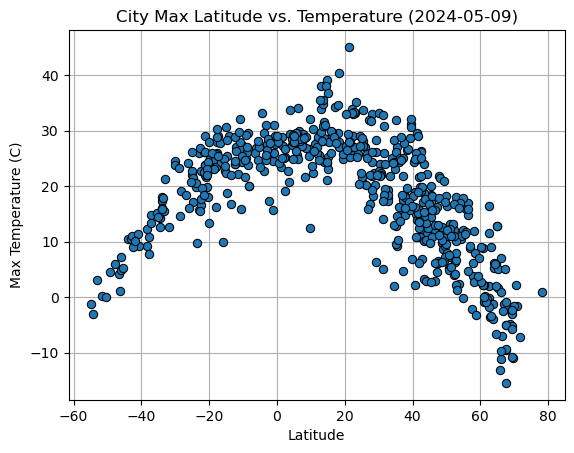

In [9]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"],
         city_data_df["Max Temp"],
         linestyle = "none",
         marker = "o",
         markeredgecolor = "black",
         markeredgewidth = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2024-05-09)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

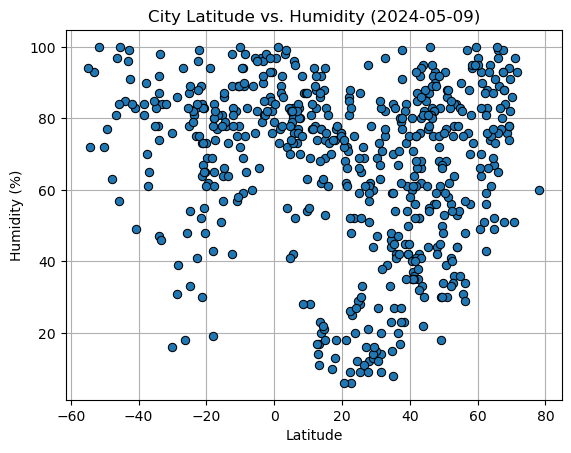

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.plot(city_data_df["Lat"],
         city_data_df["Humidity"],
         linestyle = "none",
         marker = "o",
         markeredgecolor = "black",
         markeredgewidth = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-05-09)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

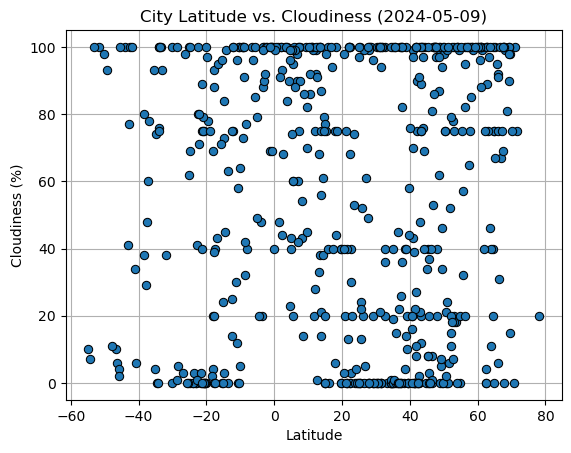

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"],
         city_data_df["Cloudiness"],
         linestyle = "none",
         marker = "o",
         markeredgecolor = "black",
         markeredgewidth = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-05-09)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

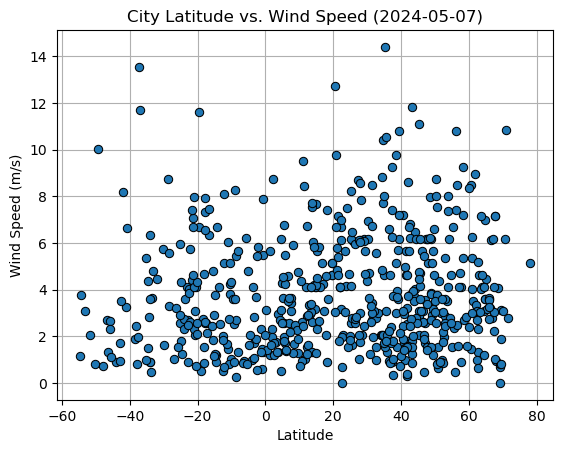

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"],
         city_data_df["Wind Speed"],
         linestyle = "none",
         marker = "o",
         markeredgecolor = "black",
         markeredgewidth = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-05-07)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_c = .1, y_c = .9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords = "axes fraction", fontsize = 15, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)
    print(f"The r-squared value is: {rvalue**2}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,3.73,56,75,4.12,US,1715202648
2,kulhudhuffushi,6.6221,73.0700,29.91,73,90,4.59,MV,1715202706
3,maymana,35.9214,64.7836,24.37,42,15,1.34,AF,1715202751
4,kingston,17.9970,-76.7936,29.53,74,75,2.06,JM,1715201948
5,nisporeni,47.0814,28.1783,12.44,56,100,1.70,MD,1715202751


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,4.52,77,93,10.02,TF,1715202645
7,kupang,-10.1667,123.5833,24.32,100,5,1.03,ID,1715202752
10,adamstown,-25.0660,-130.1015,21.93,78,100,2.58,PN,1715202754
12,puerto natales,-51.7236,-72.4875,0.25,100,100,2.06,CL,1715202651
13,edinburgh of the seven seas,-37.0676,-12.3116,14.77,65,78,11.69,SH,1715202648


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.6836429426829315


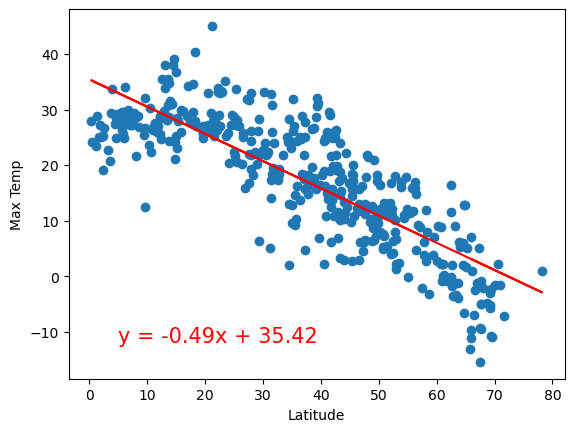

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.1, 0.1)

The r-squared value is: 0.6900481751505227


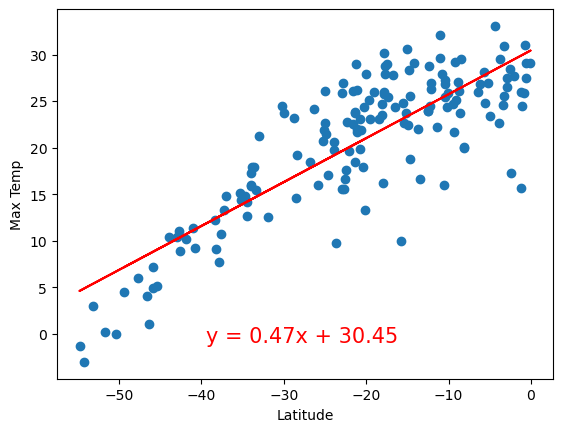

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.3, 0.1)

**Discussion about the linear relationship:**

**There is a relationship beteween the max temp and latitude based on the scatter plots we created. As we look at the graphs we can conclude that as we move away from the equator the max temp decreases (as seen with the Northern Hemisphere plots) and as we move toward the equator the max temp increases (as seen with the Southern Hemisphere plots).**


### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.009757576192360938


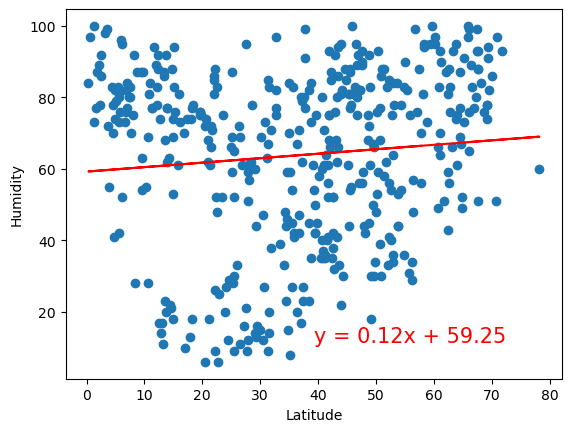

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

linear_regression(x_values, y_values, 0.5, 0.1)

The r-squared value is: 0.004415895234057847


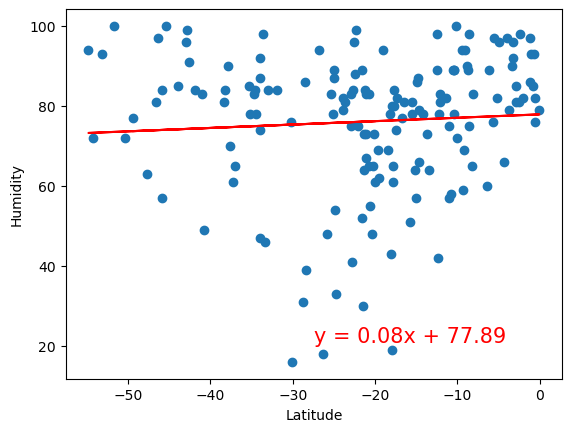

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

linear_regression(x_values, y_values, 0.5, 0.1)

**Discussion about the linear relationship:**

**As we look at both graphs that compares the correlation between a city's latitude and it's humidity, we can conclude that there is a little bit of a positive correlation between the two. Based on the graphs, as we move away from the southern hemisphere and make our way into the northern hemisphere we can notice an increase in the correlation between a city's humidity and latitude. Based on the r-squared values from both graphs we can conclude that the regression lines are not the best fit for the data points within the graph.**

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 2.2604698470392624e-07


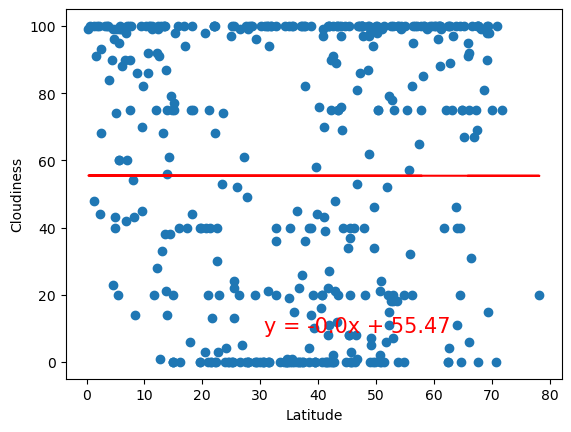

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, 0.4, 0.125)

The r-squared value is: 0.027258777148510275


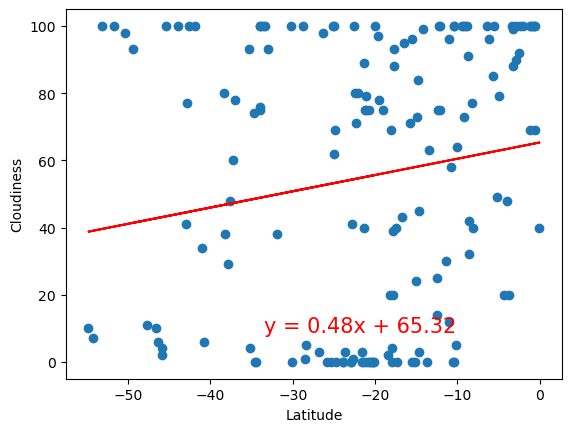

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, 0.4, 0.125)

**Discussion about the linear relationship:**

**Based on the graphs created comparing the cloudiness of a city and it's latitude, there is a positive correlation between a city's latitude and the cloudiness of that city. We can look at the plots for both northern and southern hemispheres and see that the relationship is the same for both. Now when it comes to the r-squared values for both graphs, one may say that the regression plot is not best fit for this data's variability.**

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.00088535286346616


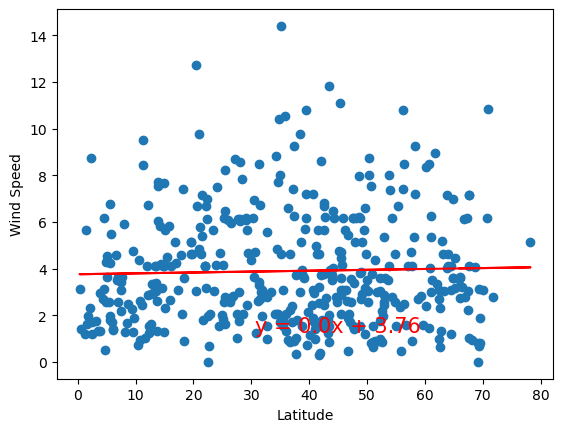

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, 0.4, 0.125)

The r-squared value is: 0.0023147355915119593


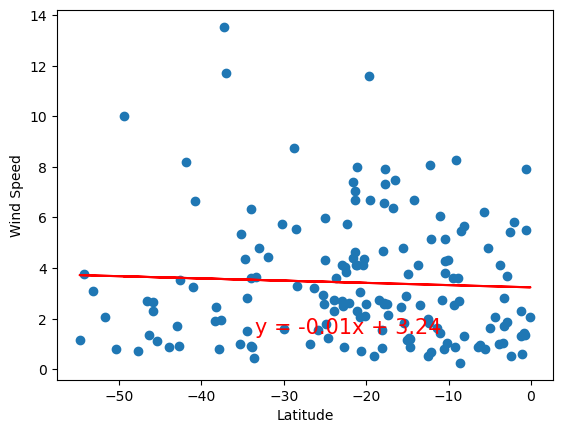

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, 0.4, 0.125)

**Discussion about the linear relationship:**

**Based on the graphs above, there is no correlation between a city' wind speed and it's latitude when looking at cities in the northern hemisphere. When it comes to the southern hemisphere is his a slight negative correlation with a r-squared value of 0.002. With that being said, one can say that as we move towards the equator there is a decrease in wind speed. With the r-squared value being so small but greater than 1, we can say that this regression line is not the best fit for the data points.**